Bar plot uses rectangular bars whose length are proportional to the values they represent.<br/>
An effective bar plot uses categorical values on one axis and numerical values on the other axis.<br/>
If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.<br/>
Here we will be using a moviereviews dataset to investigate potential baising in movie rating by fandago rating website.

In [13]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt 


In [14]:
df_review=pd.read_csv("~/fandango_scores.csv")
#considering only user review columns
cols=['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
df_norm_reviews=df_review[cols]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
RT_user_norm            146 non-null float64
Metacritic_user_nom     146 non-null float64
IMDB_norm               146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_Stars          146 non-null float64
dtypes: float64(5), object(1)
memory usage: 6.9+ KB


<b>Bar plot</b><br/>
We can use pyplot.subplots() to first generate a single subplot and return both the Figure and Axes object.<br/>
Axes.bar()-require 2 parameters->left,height<br/>
'left' parm->specify the x coordinates of the left sides of the bar<br/>
'height' parm->specify the height of each bar<br/>
'width' parm -> by default its 0.8<br/>
'np.arange() ->returns evenly spaced values to generate positons of the left sides of the bar ('left' parm values) and add space between the bars.<br/>

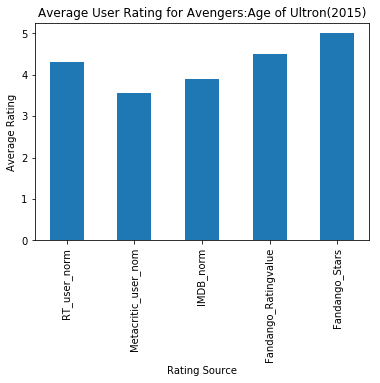

In [15]:
num_cols=df_norm_reviews.select_dtypes(exclude=['object']).columns.tolist()
bar_heights = df_norm_reviews[num_cols].iloc[0].values#height parm
bar_positions = arange(5) + 1 #left parm
tick_positions=range(1,6)

fig, ax = plt.subplots()# return figure and axes object
ax.bar(bar_positions,bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols,rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating for Avengers:Age of Ultron(2015)')
plt.show()

Horizontal barplot

We can create a horizontal bar plot in matplotlib in a similar fashion.<br/>
To convert vertical plot to horizontal plot:<br/>
-map the properties we set for the y-axis instead of the x-axis<br/>
-Instead of using Axes.bar(), we use Axes.barh().<br/>
     -bottom parameter-> to specify the y coordinate for the bottom sides for the bars.<br/>
     -width parameter-> to specify the lengths of the bars

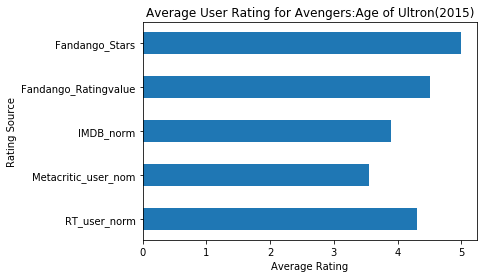

In [16]:
fig, ax = plt.subplots()# return figure and axes object
ax.barh(bar_positions,bar_heights,0.5)#bottom,width
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)

ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating for Avengers:Age of Ultron(2015)')
plt.show()

Disadvantages:<br/>
While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points.


<b>Scatter plot</b>

Line charts helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a scatter plot.<br/><br/>
A scatter plot helps us determine if 2 columns are weakly or strongly correlated.Helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.<br/><br/>
If the markers are close together,it implies that there could be a correlation<br/><br/>
We use Axes.scatter(x,y) to generate scatter plot.
x,y must be iterable objects of matching lengths(lists, NumPy arrays, or pandas series)

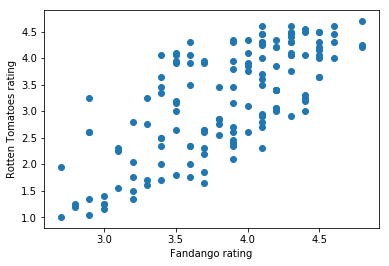

In [17]:
fig,ax=plt.subplots()
ax.scatter(df_norm_reviews['Fandango_Ratingvalue'],df_norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango rating')
ax.set_ylabel('Rotten Tomatoes rating')
plt.show()

Observations:<br/>
-There's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. <br/>
-The correlation is weak because for many x values, there are multiple corresponding y values. <br/>
-The correlation is positive because, in general, as x increases, y also increases.

To understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis.<br/>
In this example,we are not looking for the relationship between the two rating columns,instead trying to understand how much they agree.

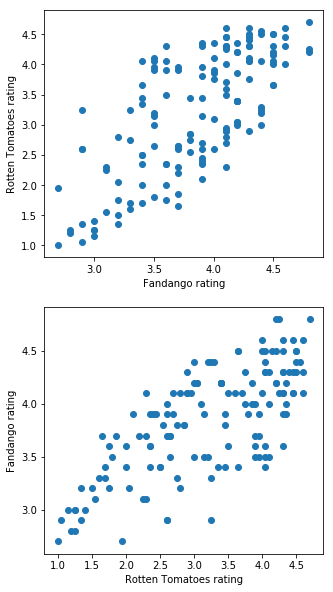

In [18]:
#Flip the axes
fig=plt.figure(figsize=(5,10))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
ax1.scatter(df_norm_reviews['Fandango_Ratingvalue'],df_norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango rating')
ax1.set_ylabel('Rotten Tomatoes rating')
ax2.scatter(df_norm_reviews['RT_user_norm'],df_norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes rating')
ax2.set_ylabel('Fandango rating')
plt.show()

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis.<br/>
We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes:<br/>
We can even use these limit methods to zoom in on a part of the plots<br/>
eg:-ax.set_xlim(4, 5)-> to focus on 4 or 5 star rating reviews
    ax.set_ylim(4, 5)

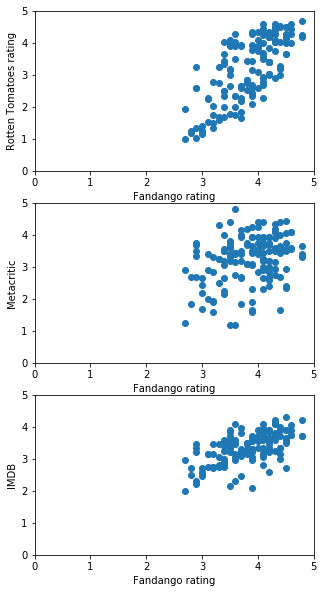

In [22]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(df_norm_reviews['Fandango_Ratingvalue'],df_norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango rating')
ax1.set_ylabel('Rotten Tomatoes rating')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(df_norm_reviews['Fandango_Ratingvalue'],df_norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango rating')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(df_norm_reviews['Fandango_Ratingvalue'],df_norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango rating')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

Observations:<br/>
    We can conclude that user ratings from IMDB and Fandango are the most similar.<br/>
    User ratings from Metacritic and Rotten Tomatoes range from 1 to 5.<br/> User ratings from Fandango range approximately from 2.5  to 5 while those from IMDB range approximately from 2 to 4.5.

Disadvantage<br/>
Scatter plot only give us a cursory understanding of the distributions.
